# K-NN

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## I. Chuẩn bị dữ liệu

In [2]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

In [5]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 30


In [6]:
col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array,
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data),
        X_scaled_df
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

# Có 2 loại dữ liệu là X_origin là X ban đầu đã được One Hot và X đã được làm sạch, chuẩn hóa.
# X = X_final
# X_origin = X_encode

In [7]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 30


In [8]:
X_encode.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

In [10]:
y_encode = y.copy()

## II. Tự định nghĩa Class, Function

In [11]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')

class KNNClassifier:
    def __init__(self, n_neighbors):
        self.k = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        if y_train.ndim > 1:
             self.y_train = y_train.flatten()
        else:
             self.y_train = y_train

    def _predict_single(self, x_test_sample):
        distances = np.linalg.norm(self.X_train - x_test_sample, axis=1)

        k_indices = np.argpartition(distances, self.k)[:self.k]

        k_neighbor_labels = self.y_train[k_indices]

        y_pred_avg = np.mean(k_neighbor_labels)

        if y_pred_avg >= 0.5:
            return 1
        else:
            return 0

    def predict(self, X_test):
        # Với mỗi x – unseen ở đầu vào (các phần tử trong tập Validation)
        y_preds = [self._predict_single(x) for x in X_test]
        return np.array(y_preds)

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

def find_best_k_and_evaluate_custom(X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG XỬ LÝ: {description}")

    # Các giá trị K cần thử (lấy số lẻ từ 1 đến 31)
    k_values_to_test = list(range(1, 32, 2))
    n_splits = 5 # Dùng 5-fold CV
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    k_f1_scores = {}

    # Vòng lặp qua từng giá trị K
    for k in k_values_to_test:
        fold_scores = []

        # Vòng lặp qua 5 fold
        for train_index, val_index in kf.split(X_train):
            X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
            y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

            # Huấn luyện mô hình KNN tự định nghĩa với K hiện tại
            model = KNNClassifier(n_neighbors=k)
            model.fit(X_cv_train, y_cv_train)
            y_cv_pred = model.predict(X_cv_val)

            # Tính F1-score (weighted) vì dữ liệu mất cân bằng
            score = f1_score(y_cv_val, y_cv_pred, average='weighted', zero_division=0)
            fold_scores.append(score)

        # Tính điểm F1 trung bình của K này
        k_f1_scores[k] = np.mean(fold_scores)

    # Tìm K có điểm F1 cao nhất
    best_k = max(k_f1_scores, key=k_f1_scores.get)
    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")

    final_model = KNNClassifier(n_neighbors=best_k)
    final_model.fit(X_train, y_train)

    y_pred = final_model.predict(X_test)

    if y_pred is not None:
        print(f"\n--- Kết quả trên tập TEST (với K={best_k}) ---")
        print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))

    print("="*60 + "\n")

In [13]:
from sklearn.model_selection import GridSearchCV

def find_best_k_and_evaluate_sklearn(X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG XỬ LÝ (GridSearchCV): {description}")

    knn_model = KNeighborsClassifier()
    # Các giá trị K cần thử (lấy số lẻ từ 1 đến 31)
    param_grid = {'n_neighbors': list(range(1, 32, 2))}

    grid_search = GridSearchCV(
        knn_model,
        param_grid,
        cv=5,
        scoring='f1_weighted', # Rất quan trọng cho dữ liệu mất cân bằng
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']

    # TỰ ĐỘNG huấn luyện lại trên toàn bộ X_train
    best_model = grid_search.best_estimator_

    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")

    print(f"\n--- Kết quả trên tập TEST (với K={best_k}) ---")
    y_pred = best_model.predict(X_test)

    print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
    print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
    print("="*60 + "\n")

In [14]:
def find_best_k_and_evaluate(
    X_train, y_train,
    X_test, y_test,
    useSmote=False,
    description=""
):
    print("="*60)
    print(f"ĐANG XỬ LÝ (GridSearchCV): {description}")

    steps = []

    # 1. Scale (bắt buộc với KNN)
    steps.append(('scaler', StandardScaler()))

    # 2. SMOTE (nếu bật)
    if useSmote:
        steps.append((
            'smote',
            SMOTE(
                sampling_strategy=0.5,   # Khuyến nghị cho IBM HR
                random_state=42
            )
        ))

    # 3. KNN
    steps.append(('knn', KNeighborsClassifier()))

    pipe = Pipeline(steps)

    # Grid cho KNN (lưu ý: knn__n_neighbors)
    param_grid = {
        'knn__n_neighbors': list(range(1, 32, 2))
    }

    grid_search = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['knn__n_neighbors']
    best_model = grid_search.best_estimator_

    print(f"\n>>> Giá trị K tốt nhất: {best_k} <<<")

    print(f"\n--- Kết quả trên tập TEST ---")
    y_pred = best_model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n",
          classification_report(y_test, y_pred, zero_division=0))
    print("\nConfusion Matrix:\n",
          confusion_matrix(y_test, y_pred))

    print("="*60 + "\n")


## III. Xây dựng mô hình

### 1. Thực hiện với dữ liệu gốc chưa chuẩn hóa

In [15]:
from sklearn.model_selection import train_test_split

X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

In [16]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_copy_encode, y_copy_encode, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_copy_encode, y_copy_encode, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_copy_encode, y_copy_encode, test_size=0.4, random_state=42
)

#### 1.1. KNN (Numpy thuần)

In [17]:
find_best_k_and_evaluate_custom(
    X_train_origin_t1.to_numpy(),
    y_train_origin_t1,
    X_test_origin_t1.to_numpy(),
    y_test_origin_t1,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 8/2)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8469

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       255
           1       0.25      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.56      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294


Ma trận nhầm lẫn:
 [[246   9]
 [ 36   3]]



In [18]:
find_best_k_and_evaluate_custom(
    X_train_origin_t2.to_numpy(),
    y_train_origin_t2,
    X_test_origin_t2.to_numpy(),
    y_test_origin_t2,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8435

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       380
           1       0.21      0.05      0.08        61

    accuracy                           0.84       441
   macro avg       0.54      0.51      0.50       441
weighted avg       0.77      0.84      0.80       441


Ma trận nhầm lẫn:
 [[369  11]
 [ 58   3]]



In [19]:
find_best_k_and_evaluate_custom(
    X_train_origin_t3.to_numpy(),
    y_train_origin_t3,
    X_test_origin_t3.to_numpy(),
    y_test_origin_t3,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8282

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       507
           1       0.24      0.11      0.15        81

    accuracy                           0.83       588
   macro avg       0.55      0.53      0.53       588
weighted avg       0.78      0.83      0.80       588


Ma trận nhầm lẫn:
 [[478  29]
 [ 72   9]]



#### 1.2. KNN (Thư viện)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t1, y_train_origin_t1,
    X_test_origin_t1, y_test_origin_t1,
    "KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 8/2)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8469

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       255
           1       0.25      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.56      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294


Ma trận nhầm lẫn:
 [[246   9]
 [ 36   3]]



In [22]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t2, y_train_origin_t2,
    X_test_origin_t2, y_test_origin_t2,
    "KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8390

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       380
           1       0.29      0.11      0.16        61

    accuracy                           0.84       441
   macro avg       0.58      0.54      0.54       441
weighted avg       0.79      0.84      0.81       441


Ma trận nhầm lẫn:
 [[363  17]
 [ 54   7]]



In [23]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t3, y_train_origin_t3,
    X_test_origin_t3, y_test_origin_t3,
    "KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8282

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       507
           1       0.24      0.11      0.15        81

    accuracy                           0.83       588
   macro avg       0.55      0.53      0.53       588
weighted avg       0.78      0.83      0.80       588


Ma trận nhầm lẫn:
 [[478  29]
 [ 72   9]]



#### 1.3. Nhận xét

- Kết quả của hai phương pháp là gần như giống hệt nhau ở cả 3 tỷ lệ chia
- Accuracy (83-85%) là VÔ NGHĨA: Nó chỉ cao vì mô hình dự đoán đúng Lớp 0 (lớp đa số).

- Thất bại ở Lớp 1 (Nghỉ việc): Hãy nhìn vào recall của Lớp 1 ở 1 số trường hợp ví dụ:

    - Split 4/1 (k=7): recall = 0.08 (Ma trận [36, 3]). Mô hình bỏ sót 36/39 (92%) người nghỉ việc.

    - Split 7/3 (k=7): recall = 0.05 (Ma trận [58, 3]). Mô hình bỏ sót 58/61 (95%) người nghỉ việc.

    - Split 6/4 (k=5): recall = 0.11 (Ma trận [72, 9]). Mô hình bỏ sót 72/81 (89%) người nghỉ việc.

- Chạy KNN trên dữ liệu chưa chuẩn hóa rất là thảm hại.

- Lý do: Mô hình đã bị "lừa" hoàn toàn. Nó chỉ dựa vào các cột có giá trị lớn (như MonthlyIncome) để tính khoảng cách và bỏ qua những cột 0/1 còn lại.

### 2. Thực hiện với dữ liệu đã chuẩn hóa

In [24]:
from sklearn.model_selection import train_test_split

X_final_copy = X_final.copy()
y_encode_copy = y_encode.copy()

In [25]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_final_copy, y_encode_copy, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_final_copy, y_encode_copy, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_final_copy, y_encode_copy, test_size=0.4, random_state=42
)

#### 2.1. KNN (Numpy thuần)

In [26]:
find_best_k_and_evaluate_custom(
    X_train_origin_t1.to_numpy(),
    y_train_origin_t1,
    X_test_origin_t1.to_numpy(),
    y_test_origin_t1,
    "KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 8/2)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8707

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.55      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.84      0.87      0.84       294


Ma trận nhầm lẫn:
 [[250   5]
 [ 33   6]]



In [27]:
find_best_k_and_evaluate_custom(
    X_train_origin_t2.to_numpy(),
    y_train_origin_t2,
    X_test_origin_t2.to_numpy(),
    y_test_origin_t2,
    "KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 3 <<<

--- Kết quả trên tập TEST (với K=3) ---
Độ chính xác (Accuracy): 0.8571

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       380
           1       0.45      0.15      0.22        61

    accuracy                           0.86       441
   macro avg       0.66      0.56      0.57       441
weighted avg       0.82      0.86      0.82       441


Ma trận nhầm lẫn:
 [[369  11]
 [ 52   9]]



In [28]:
find_best_k_and_evaluate_custom(
    X_train_origin_t3.to_numpy(),
    y_train_origin_t3,
    X_test_origin_t3.to_numpy(),
    y_test_origin_t3,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 3 <<<

--- Kết quả trên tập TEST (với K=3) ---
Độ chính xác (Accuracy): 0.8605

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       507
           1       0.48      0.16      0.24        81

    accuracy                           0.86       588
   macro avg       0.68      0.57      0.58       588
weighted avg       0.82      0.86      0.83       588


Ma trận nhầm lẫn:
 [[493  14]
 [ 68  13]]



#### 2.2. KNN (Thư viện)

In [29]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t1, y_train_origin_t1,
    X_test_origin_t1, y_test_origin_t1,
    "KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 8/2)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8707

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.55      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.84      0.87      0.84       294


Ma trận nhầm lẫn:
 [[250   5]
 [ 33   6]]



In [30]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t2, y_train_origin_t2,
    X_test_origin_t2, y_test_origin_t2,
    "KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8639

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441


Ma trận nhầm lẫn:
 [[376   4]
 [ 56   5]]



In [31]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t3, y_train_origin_t3,
    X_test_origin_t3, y_test_origin_t3,
    "KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 3 <<<

--- Kết quả trên tập TEST (với K=3) ---
Độ chính xác (Accuracy): 0.8605

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       507
           1       0.48      0.16      0.24        81

    accuracy                           0.86       588
   macro avg       0.68      0.57      0.58       588
weighted avg       0.82      0.86      0.83       588


Ma trận nhầm lẫn:
 [[493  14]
 [ 68  13]]



#### 2.3. Nhận xét

- Hiệu suất chung

    - Accuracy 86-87% khá tốt nhưng gây hiểu lầm do class imbalance
    - Kết quả ổn định qua các train/test split → model không bị overfitting nghiêm trọng

- Vấn đề nghiêm trọng: Class 1 bị "bỏ rơi"
- Class 0 (majority): Hoạt động xuất sắc

    - Recall 97-99% → gần như bắt hết
    - Precision 87-88% → dự đoán chính xác

- Class 1 (minority): Thất bại hoàn toàn

    - Recall 8-16%: Bỏ sót 84-92% mẫu thực tế!
    - Precision 45-56%: Hơn 1/2 dự đoán sai
    - F1-score 0.14-0.24: Không thể chấp nhận được

### 3. Thực hiện với dữ liệu đã giảm chiều

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def run_pipeline(X_train, X_test, y_train, y_test,
                 continuous_data,
                 ordered_categorical_data,
                 n_components=None,
                 model_func=None,
                 title=None,
                 dim_reduction=None,
                 use_smote=False,
                sampling_strategy=0.5
                 ):
    X_train_std = X_train.copy()
    X_test_std = X_test.copy()

    # Xác định các cột liên tục có trong tập hiện tại
    cont_cols = [col for col in continuous_data if col in X_train_std.columns]

    # Xác định các cột categorical có thứ tự có trong tập hiện tại
    ordered_cat_cols = [col for col in ordered_categorical_data if col in X_train_std.columns]

    # Chuẩn hóa các cột liên tục
    scaler_cont = StandardScaler()
    if cont_cols:
        X_train_std[cont_cols] = scaler_cont.fit_transform(X_train_std[cont_cols])
        X_test_std[cont_cols] = scaler_cont.transform(X_test_std[cont_cols])

    # Chuẩn hóa các cột categorical có thứ tự
    scaler_ordered = StandardScaler()
    if ordered_cat_cols:
        X_train_std[ordered_cat_cols] = scaler_ordered.fit_transform(X_train_std[ordered_cat_cols])
        X_test_std[ordered_cat_cols] = scaler_ordered.transform(X_test_std[ordered_cat_cols])

    if n_components is not None and dim_reduction:
        if dim_reduction.lower() == 'pca':
            reducer = PCA(n_components=n_components)
            X_train_std = reducer.fit_transform(X_train_std)
            X_test_std = reducer.transform(X_test_std)

        elif dim_reduction.lower() == 'lda':
            n_classes = len(set(y_train))
            max_components = min(n_components, n_classes - 1)

            reducer = LDA(n_components=max_components)
            X_train_std = reducer.fit_transform(X_train_std, y_train)
            X_test_std = reducer.transform(X_test_std)

    if use_smote:
        smote = SMOTE(
            sampling_strategy=sampling_strategy,
            random_state=42
        )
        X_train_std, y_train = smote.fit_resample(X_train_std, y_train)

    return model_func(X_train_std, y_train, X_test_std, y_test, title)

In [33]:
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
ordered_categorical_data = [
    'Education', 'Environment satisfaction', 'Job involvement', 'Job satisfaction', 'Performance rating', 'Relationship satisfaction', 'Work-life balance'
]

#### 3.1. Giảm chiều sử dụng PCA

In [34]:
# Lấy data
X_pca = X_encode.copy()
y_pca = y_encode.copy()

In [35]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca = train_test_split(X_pca, y_pca, test_size=0.4, random_state=42)

##### 3.1.1. KNN (Numpy thuần)

In [36]:
run_pipeline(
    X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_custom,
    title="KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 8/2)",
    dim_reduction='pca'
)

ĐANG XỬ LÝ: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8367

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.24      0.10      0.14        39

    accuracy                           0.84       294
   macro avg       0.55      0.53      0.53       294
weighted avg       0.79      0.84      0.81       294


Ma trận nhầm lẫn:
 [[242  13]
 [ 35   4]]



In [37]:
run_pipeline(
    X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_custom,
    title="KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)",
    dim_reduction='pca'
)

ĐANG XỬ LÝ: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8458

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       380
           1       0.23      0.05      0.08        61

    accuracy                           0.85       441
   macro avg       0.55      0.51      0.50       441
weighted avg       0.78      0.85      0.80       441


Ma trận nhầm lẫn:
 [[370  10]
 [ 58   3]]



In [38]:
run_pipeline(
    X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_custom,
    title="KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)",
    dim_reduction='pca'
)

ĐANG XỬ LÝ: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8588

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       507
           1       0.43      0.07      0.13        81

    accuracy                           0.86       588
   macro avg       0.65      0.53      0.52       588
weighted avg       0.81      0.86      0.81       588


Ma trận nhầm lẫn:
 [[499   8]
 [ 75   6]]



##### 3.1.2. KNN (Thư viện)

In [39]:
run_pipeline(
    X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 8/2)",
    dim_reduction='pca'
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 3 <<<

--- Kết quả trên tập TEST (với K=3) ---
Độ chính xác (Accuracy): 0.8163

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       255
           1       0.14      0.08      0.10        39

    accuracy                           0.82       294
   macro avg       0.51      0.50      0.50       294
weighted avg       0.77      0.82      0.79       294


Ma trận nhầm lẫn:
 [[237  18]
 [ 36   3]]



In [40]:
run_pipeline(
    X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)",
    dim_reduction='pca'
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8277

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       380
           1       0.24      0.11      0.16        61

    accuracy                           0.83       441
   macro avg       0.56      0.53      0.53       441
weighted avg       0.78      0.83      0.80       441


Ma trận nhầm lẫn:
 [[358  22]
 [ 54   7]]



In [41]:
run_pipeline(
    X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)",
    dim_reduction='pca'
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 3 <<<

--- Kết quả trên tập TEST (với K=3) ---
Độ chính xác (Accuracy): 0.8350

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       507
           1       0.32      0.17      0.22        81

    accuracy                           0.84       588
   macro avg       0.60      0.56      0.57       588
weighted avg       0.80      0.84      0.81       588


Ma trận nhầm lẫn:
 [[477  30]
 [ 67  14]]



#### 3.2. Giảm chiều sử dụng LDA

In [42]:
# Lấy data
X_lda = X_encode.copy()
y_lda = y_encode.copy()

In [43]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)
X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda = train_test_split(X_lda, y_lda, test_size=0.3, random_state=42)
X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda = train_test_split(X_lda, y_lda, test_size=0.4, random_state=42)

##### 3.2.1. KNN (Numpy thuần)

In [44]:
run_pipeline(
    X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_custom,
    title="KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 8/2)",
    dim_reduction='lda'
)

ĐANG XỬ LÝ: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 27 <<<

--- Kết quả trên tập TEST (với K=27) ---
Độ chính xác (Accuracy): 0.8844

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.63      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.77      0.64      0.67       294
weighted avg       0.87      0.88      0.87       294


Ma trận nhầm lẫn:
 [[248   7]
 [ 27  12]]



In [45]:
run_pipeline(
    X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_custom,
    title="KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)",
    dim_reduction='lda'
)

ĐANG XỬ LÝ: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 19 <<<

--- Kết quả trên tập TEST (với K=19) ---
Độ chính xác (Accuracy): 0.8707

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.57      0.26      0.36        61

    accuracy                           0.87       441
   macro avg       0.73      0.62      0.64       441
weighted avg       0.85      0.87      0.85       441


Ma trận nhầm lẫn:
 [[368  12]
 [ 45  16]]



In [46]:
run_pipeline(
    X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_custom,
    title="KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)",
    dim_reduction='lda'
)

ĐANG XỬ LÝ: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 9 <<<

--- Kết quả trên tập TEST (với K=9) ---
Độ chính xác (Accuracy): 0.8690

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       507
           1       0.54      0.36      0.43        81

    accuracy                           0.87       588
   macro avg       0.72      0.65      0.68       588
weighted avg       0.85      0.87      0.86       588


Ma trận nhầm lẫn:
 [[482  25]
 [ 52  29]]



##### 3.2.2. KNN (Thư viện)

In [47]:
run_pipeline(
    X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 8/2)",
    dim_reduction='lda'
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 27 <<<

--- Kết quả trên tập TEST (với K=27) ---
Độ chính xác (Accuracy): 0.8844

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.63      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.77      0.64      0.67       294
weighted avg       0.87      0.88      0.87       294


Ma trận nhầm lẫn:
 [[248   7]
 [ 27  12]]



In [48]:
run_pipeline(
    X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)",
    dim_reduction='lda'
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 21 <<<

--- Kết quả trên tập TEST (với K=21) ---
Độ chính xác (Accuracy): 0.8730

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.59      0.26      0.36        61

    accuracy                           0.87       441
   macro avg       0.74      0.62      0.65       441
weighted avg       0.85      0.87      0.85       441


Ma trận nhầm lẫn:
 [[369  11]
 [ 45  16]]



In [49]:
run_pipeline(
    X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)",
    dim_reduction='lda'
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 25 <<<

--- Kết quả trên tập TEST (với K=25) ---
Độ chính xác (Accuracy): 0.8741

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       507
           1       0.58      0.31      0.40        81

    accuracy                           0.87       588
   macro avg       0.74      0.64      0.67       588
weighted avg       0.85      0.87      0.86       588


Ma trận nhầm lẫn:
 [[489  18]
 [ 56  25]]



#### 3.3. Nhận xét

- So với kết quả của Dữ liệu gốc (44 cột) chưa chuẩn hóa ở lượt trước:

  + Kết quả của PCA n=6 (giảm xuống còn 6 cột) tốt hơn dữ liệu gốc chưa chuẩn hóa 1 chút nhưng vẫn rất tệ bởi vì PCA là phương pháp không giám sát. Nó chỉ giữ lại 6 cột có phương sai lớn nhất, chứ không phải 6 cột phân loại tốt nhất. Nó đã vô tình vứt bỏ thông tin quan trọng.

  + Kết quả của LDA là tốt nhất bởi vì LDA là phương pháp có giám sát. Nó đã tìm ra 1 chiều duy nhất "phân tách" Lớp 0 và Lớp 1 tốt nhất.

- Kết quả của LDA vượt trội hơn hẳn so với cả PCA.

- PCA (n=6): Phương pháp này là một thất bại cho bài toán.

    - Nhìn vào recall (tỷ lệ phát hiện) của Lớp 1 (Nghỉ việc). Các giá trị này cực kỳ thấp, chỉ dao động từ 0.05 đến 0.17.

    - Điều này có nghĩa là mô hình PCA đã bỏ sót 80% đến 95% số nhân viên thực sự nghỉ việc.

    - macro avg f1-score (chỉ số cân bằng) cũng rất tệ, chỉ ~0.51 - 0.57.

- LDA (n=1): Phương pháp này tốt hơn đáng kể.

    - recall của Lớp 1 đã tăng lên, dao động từ 0.26 đến 0.36.

    - f1-score của Lớp 1 cũng tăng, lên ~0.31 - 0.40.

    - macro avg f1-score (chỉ số cân bằng) đã cải thiện lên ~0.68.

- Đánh giá:
    - LDA là phương pháp giảm chiều phù hợp hơn hẳn cho bài toán này.

    - Do PCA là không giám sát (unsupervised), nó không quan tâm đến nhãn Yes/No. Nó chỉ giữ lại các chiều có phương sai lớn nhất.

    - Ngược lại, LDA (Linear Discriminant Analysis) là có giám sát (supervised). Mục tiêu của nó chính là tìm ra các chiều mới (1 chiều duy nhất trong bài toán nhị phân này) sao cho độ phân tách giữa hai lớp Yes và No là lớn nhất. LDA đã thành công trong việc "chiếu" dữ liệu 44 chiều xuống 1 chiều duy nhất mà vẫn giữ lại được thông tin quan trọng nhất để phân loại.

- Đây không phải là Overfitting.

    - Cả 3 phương pháp (Dữ liệu gốc, PCA, LDA) đều cho thấy cùng một vấn đề: Mô hình bị thiên vị (biased) và học chưa tới (underfitting) đối với Lớp 1.

    - Lý do vẫn là dữ liệu mất cân bằng (imbalanced data). Mặc dù LDA đã cải thiện đáng kể kết quả (vì nó tập trung vào việc tách lớp), nó vẫn chưa thể giải quyết triệt để vấn đề là có quá ít mẫu Lớp 1 để học.

- "Hiệu chỉnh" (regularization) cho KNN chính là việc chọn ra K tối ưu (Đã làm ở trên). Việc này giúp cân bằng giữa Bias và Variance. Tuy nhiên, chỉ hiệu chỉnh k là không đủ, vì vấn đề nằm ở dữ liệu.

## IV. Thực nghiệm lại sử dụng cân bằng dữ liệu (Sử dụng luôn thư viện)

#### Dữ liệu gốc đã chuẩn hóa


In [50]:
from sklearn.model_selection import train_test_split

X_final_copy = X_final.copy()
y_encode_copy = y_encode.copy()

In [51]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_final_copy, y_encode_copy, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_final_copy, y_encode_copy, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_final_copy, y_encode_copy, test_size=0.4, random_state=42
)

In [52]:
find_best_k_and_evaluate(
    X_train_origin_t1, y_train_origin_t1,
    X_test_origin_t1, y_test_origin_t1,
    useSmote=True,
    description="KNN + SMOTE với dữ liệu gốc đã chuẩn hóa tỉ lệ 8/2"
)

ĐANG XỬ LÝ (GridSearchCV): KNN + SMOTE với dữ liệu gốc đã chuẩn hóa tỉ lệ 8/2

>>> Giá trị K tốt nhất: 31 <<<

--- Kết quả trên tập TEST ---
Accuracy: 0.8163

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       255
           1       0.33      0.38      0.36        39

    accuracy                           0.82       294
   macro avg       0.62      0.63      0.62       294
weighted avg       0.83      0.82      0.82       294


Confusion Matrix:
 [[225  30]
 [ 24  15]]



In [53]:
find_best_k_and_evaluate(
    X_train_origin_t2, y_train_origin_t2,
    X_test_origin_t2, y_test_origin_t2,
    useSmote=True,
    description="KNN + SMOTE với dữ liệu gốc đã chuẩn hóa tỉ lệ 7/3"
)

ĐANG XỬ LÝ (GridSearchCV): KNN + SMOTE với dữ liệu gốc đã chuẩn hóa tỉ lệ 7/3

>>> Giá trị K tốt nhất: 29 <<<

--- Kết quả trên tập TEST ---
Accuracy: 0.7982

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       380
           1       0.35      0.52      0.42        61

    accuracy                           0.80       441
   macro avg       0.63      0.68      0.65       441
weighted avg       0.84      0.80      0.81       441


Confusion Matrix:
 [[320  60]
 [ 29  32]]



In [54]:
find_best_k_and_evaluate(
    X_train_origin_t3, y_train_origin_t3,
    X_test_origin_t3, y_test_origin_t3,
    useSmote=True,
    description="KNN + SMOTE với dữ liệu gốc đã chuẩn hóa tỉ lệ 6/4"
)

ĐANG XỬ LÝ (GridSearchCV): KNN + SMOTE với dữ liệu gốc đã chuẩn hóa tỉ lệ 6/4

>>> Giá trị K tốt nhất: 29 <<<

--- Kết quả trên tập TEST ---
Accuracy: 0.8129

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       507
           1       0.35      0.42      0.38        81

    accuracy                           0.81       588
   macro avg       0.63      0.65      0.64       588
weighted avg       0.83      0.81      0.82       588


Confusion Matrix:
 [[444  63]
 [ 47  34]]



#### Dữ liệu đã giảm chiều bằng PCA


In [55]:
# Lấy data
X_pca = X_encode.copy()
y_pca = y_encode.copy()
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca = train_test_split(X_pca, y_pca, test_size=0.2,
                                                                                random_state=42)
X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca = train_test_split(X_pca, y_pca, test_size=0.3,
                                                                                random_state=42)
X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca = train_test_split(X_pca, y_pca, test_size=0.4,
                                                                                random_state=42)

In [56]:
run_pipeline(
    X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN + Smote (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 8/2)",
    dim_reduction='pca',
    use_smote=True,
    sampling_strategy=0.5
)

ĐANG XỬ LÝ (GridSearchCV): KNN + Smote (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 1 <<<

--- Kết quả trên tập TEST (với K=1) ---
Độ chính xác (Accuracy): 0.7075

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       255
           1       0.11      0.18      0.14        39

    accuracy                           0.71       294
   macro avg       0.49      0.48      0.48       294
weighted avg       0.76      0.71      0.73       294


Ma trận nhầm lẫn:
 [[201  54]
 [ 32   7]]



In [57]:
run_pipeline(
    X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN + Smote  (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)",
    dim_reduction='pca',
    use_smote=True,
    sampling_strategy=0.5
)

ĐANG XỬ LÝ (GridSearchCV): KNN + Smote  (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 1 <<<

--- Kết quả trên tập TEST (với K=1) ---
Độ chính xác (Accuracy): 0.7392

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       380
           1       0.19      0.28      0.23        61

    accuracy                           0.74       441
   macro avg       0.53      0.55      0.54       441
weighted avg       0.78      0.74      0.76       441


Ma trận nhầm lẫn:
 [[309  71]
 [ 44  17]]



In [58]:
run_pipeline(
    X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca,
    continuous_data,
    ordered_categorical_data,
    n_components=6,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN + Smote  (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)",
    dim_reduction='pca',
    use_smote=True,
    sampling_strategy=0.5
)

ĐANG XỬ LÝ (GridSearchCV): KNN + Smote  (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 1 <<<

--- Kết quả trên tập TEST (với K=1) ---
Độ chính xác (Accuracy): 0.7211

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       507
           1       0.19      0.32      0.24        81

    accuracy                           0.72       588
   macro avg       0.54      0.55      0.53       588
weighted avg       0.78      0.72      0.75       588


Ma trận nhầm lẫn:
 [[398 109]
 [ 55  26]]



#### Dữ liệu đã được giảm chiều bằng LDA


In [59]:
# Lấy data
X_lda = X_encode.copy()
y_lda = y_encode.copy()
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda = train_test_split(X_lda, y_lda, test_size=0.2,
                                                                                random_state=42)
X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda = train_test_split(X_lda, y_lda, test_size=0.3,
                                                                                random_state=42)
X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda = train_test_split(X_lda, y_lda, test_size=0.4,
                                                                                random_state=42)

In [60]:
run_pipeline(
    X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN + Smote  (Thư viện) - LDA đã chuẩn hóa (train/test: 8/2)",
    dim_reduction='lda',
    use_smote=True,
    sampling_strategy=0.5
)

ĐANG XỬ LÝ (GridSearchCV): KNN + Smote  (Thư viện) - LDA đã chuẩn hóa (train/test: 8/2)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 11 <<<

--- Kết quả trên tập TEST (với K=11) ---
Độ chính xác (Accuracy): 0.8163

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       255
           1       0.38      0.62      0.47        39

    accuracy                           0.82       294
   macro avg       0.66      0.73      0.68       294
weighted avg       0.86      0.82      0.83       294


Ma trận nhầm lẫn:
 [[216  39]
 [ 15  24]]



In [61]:
run_pipeline(
    X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN + Smote  (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)",
    dim_reduction='lda',
    use_smote=True,
    sampling_strategy=0.5
)

ĐANG XỬ LÝ (GridSearchCV): KNN + Smote  (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 29 <<<

--- Kết quả trên tập TEST (với K=29) ---
Độ chính xác (Accuracy): 0.8299

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       380
           1       0.41      0.54      0.47        61

    accuracy                           0.83       441
   macro avg       0.67      0.71      0.68       441
weighted avg       0.85      0.83      0.84       441


Ma trận nhầm lẫn:
 [[333  47]
 [ 28  33]]



In [62]:
run_pipeline(
    X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda,
    continuous_data,
    ordered_categorical_data,
    n_components=2,
    model_func=find_best_k_and_evaluate_sklearn,
    title="KNN + Smote  (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)",
    dim_reduction='lda',
    use_smote=True,
    sampling_strategy=0.5
)

ĐANG XỬ LÝ (GridSearchCV): KNN + Smote  (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 9 <<<

--- Kết quả trên tập TEST (với K=9) ---
Độ chính xác (Accuracy): 0.8520

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       507
           1       0.47      0.49      0.48        81

    accuracy                           0.85       588
   macro avg       0.69      0.70      0.70       588
weighted avg       0.86      0.85      0.85       588


Ma trận nhầm lẫn:
 [[461  46]
 [ 41  40]]



#### Nhận xét


1. Sự đánh đổi giữa Accuracy (Độ chính xác tổng thể) và Recall (Độ nhạy)

- Trước khi SMOTE: Accuracy rất cao (~86-88%) nhưng Recall của lớp 1 cực thấp (chỉ từ 0.08 - 0.15). Điều này có nghĩa là mô hình gần như bỏ qua lớp thiểu số (lớp 1) và chỉ đoán toàn lớp 0.

- Sau khi SMOTE: Accuracy tổng thể giảm xuống (khoảng 80-85%), nhưng Recall của lớp 1 tăng vọt (lên mức 0.40 - 0.62).

=> Kết luận: SMOTE đã hoạt động hiệu quả trong việc ép mô hình phải "học" lớp 1, thay vì lờ nó đi. Sự sụt giảm Accuracy là chấp nhận được để đổi lấy khả năng phát hiện lớp 1 tốt hơn.

2. So sánh hiệu quả kết hợp: SMOTE + Giảm chiều dữ liệu
- Có sự khác biệt rất lớn giữa việc kết hợp SMOTE với PCA và SMOTE với LDA:
- SMOTE + PCA (Kết quả tệ nhất)
    - Hiện tượng: Kết quả rất tệ. Accuracy rớt xuống mức thấp nhất (~70-73%). Giá trị $K$ tốt nhất tìm được là $K=1$.
    - Phân tích: Việc $K=1$ là dấu hiệu của Overfitting (quá khớp). Khi SMOTE sinh ra các điểm dữ liệu giả lập, PCA có thể đã làm mất đi các đặc trưng quan trọng phân tách hai lớp hoặc SMOTE sinh ra nhiễu (noise) mà PCA không xử lý tốt.
    - Hậu quả: Precision và Recall của lớp 1 đều rất thấp (Precision ~0.11 - 0.19). Mô hình bối rối và dự đoán sai rất nhiều (False Positive tăng cao).
- SMOTE + LDA (Kết quả tốt nhất)
    - Hiện tượng: Đây là cấu hình cho kết quả cân bằng và tốt nhất.
    - Số liệu:
        - Accuracy vẫn giữ được mức khá tốt (~82-85%).
        - Recall lớp 1 đạt đỉnh: Lên tới 0.62 (ở tỷ lệ chia 8/2) và 0.54 (ở tỷ lệ 7/3).
        - F1-score của lớp 1 đạt mức cao nhất trong các thí nghiệm (~0.47 - 0.48).
    - Phân tích: LDA (Linear Discriminant Analysis) là thuật toán giảm chiều có giám sát, nó cố gắng tìm không gian chia tách tốt nhất giữa các lớp. Khi kết hợp với SMOTE (làm dày dữ liệu lớp 1), LDA càng có cơ sở để tìm ra đường biên phân lớp rõ ràng hơn.

3. Phân tích Ma trận nhầm lẫn (Confusion Matrix)

- Trước SMOTE: Lỗi chủ yếu là False Negative (Thực tế là 1 nhưng đoán là 0). Ví dụ: Có 39 mẫu lớp 1 thì đoán sai tới 33-36 mẫu.

- Sau SMOTE (đặc biệt là LDA): Số lượng False Negative giảm đáng kể (từ 33 xuống còn 15 ở tỉ lệ 8/2). Tuy nhiên, số lượng False Positive (Thực tế là 0 nhưng đoán là 1) lại tăng lên.

- Ví dụ (LDA 8/2): Đoán đúng 24 mẫu lớp 1 (so với chỉ 6 mẫu khi chưa SMOTE), nhưng lại nhìn nhầm 39 mẫu lớp 0 thành lớp 1.

4. Tác động của tỷ lệ chia Train/Test (8/2, 7/3, 6/4)
- Với SMOTE + LDA, tỷ lệ 8/2 cho kết quả Recall lớp 1 tốt nhất (0.62).

- Điều này hợp lý vì SMOTE cần dữ liệu gốc đủ nhiều để nội suy ra các điểm mới chất lượng. Khi dữ liệu train nhiều hơn (8 phần), SMOTE học được cấu trúc tốt hơn của lớp thiểu số.

## V. Trực quan

In [63]:
from matplotlib import pyplot as plt


def helper_and_plot(X, y, model=None, command='Default command',
           reduce_name=None, n_components=2, test_size=0.3, useSmote=False, sampling_strategy=0.5, random_state=42):
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import numpy as np
    import time

    # Dữ liệu liên tục
    continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
    ]
    ordered_categorical_data = [
        'Education', 'Environment satisfaction', 'Job involvement',
        'Job satisfaction', 'Performance rating', 'Relationship satisfaction',
        'Work-life balance'
    ]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    X_train = X_train.copy()
    X_test = X_test.copy()

    cont_cols = [col for col in continuous_data if col in X_train.columns]
    ordered_cat_cols = [col for col in ordered_categorical_data if col in X_train.columns]

    # Chuẩn hóa các cột liên tục
    scaler_cont = StandardScaler()
    if cont_cols:
        X_train[cont_cols] = scaler_cont.fit_transform(X_train[cont_cols])
        X_test[cont_cols] = scaler_cont.transform(X_test[cont_cols])

    # Chuẩn hóa các cột categorical có thứ tự
    scaler_ordered = StandardScaler()
    if ordered_cat_cols:
        X_train[ordered_cat_cols] = scaler_ordered.fit_transform(X_train[ordered_cat_cols])
        X_test[ordered_cat_cols] = scaler_ordered.transform(X_test[ordered_cat_cols])

    if reduce_name == 'pca':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'lda':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)

    if useSmote:
        smote = SMOTE(
            sampling_strategy=sampling_strategy,
            random_state=42
        )
        X_train, y_train = smote.fit_resample(X_train, y_train)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()


    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()

        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))

        # Điểm đúng và sai
        correct = (y_pred == y_test)

        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')

        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    print()
    print('=' * 20, command, f'giữ lại {n_components} chiều', '=' * 20)
    print(f'X_train: {np.shape(X_train)}, X_test: {np.shape(X_test)}')
    print(f'Total time: {end_time - start_time:.4f}s')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
    print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    print('=' * 20, command, '=' * 20)
    print()

    plot_prediction_vs_true(y_pred, y_test)


==================== KNN (Sklearn, K=11) - LDA + Smote đã chuẩn hóa (train/test: 8/2) giữ lại 1 chiều ====================
X_train: (1467, 1), X_test: (294, 1)
Total time: 0.0027s
Accuracy of model KNeighborsClassifier: 0.8163
Precision: 0.3810
Recall: 0.6154
F1-score: 0.4706
Confusion matrix:
[[216  39]
 [ 15  24]]
==================== KNN (Sklearn, K=11) - LDA + Smote đã chuẩn hóa (train/test: 8/2) ====================



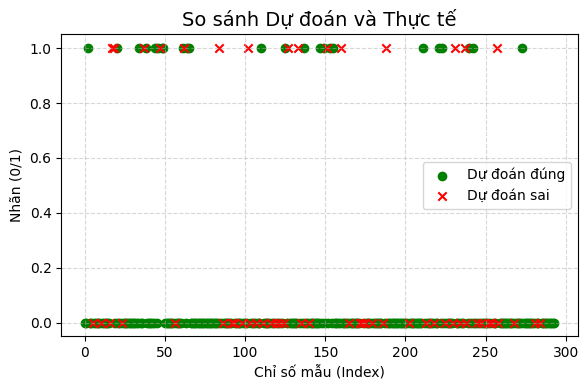

In [64]:
model_knn = KNeighborsClassifier(n_neighbors=11)
X = X_encode.copy()
y = y_encode.copy()
helper_and_plot(
    X, y, model = model_knn, command = f'KNN (Sklearn, K={11}) - LDA + Smote đã chuẩn hóa (train/test: 8/2)',
    reduce_name = 'lda', n_components = 1, test_size=0.2, useSmote=True, sampling_strategy=0.5, random_state=42
)


- Đánh giá mô hình có phù hợp không?
- Nhận định: Mô hình KNN, ngay cả khi kết hợp với LDA, chỉ phù hợp ở mức độ nhất định nhưng chưa phải là mô hình tối ưu cho bài toán này.

=> Mô hình "phù hợp một phần"
- Mô hình thực hiện rất tốt nhiệm vụ dự đoán Lớp 0 (Nhân viên ở lại).

- Chỉ số Accuracy tổng thể cao (gần 88%), cho thấy mô hình đã học được phần lớn dữ liệu (là Lớp 0).

=> Mô hình "chưa tối ưu"

- Mục tiêu của bài toán: Mục tiêu kinh doanh thực tế không phải là tìm ra người ở lại, mà là tìm ra người sắp nghỉ (Lớp 1) để có biện pháp can thiệp.

- Kết quả thực tế: Mô hình thất bại nặng ở mục tiêu này.

=> Nguyên nhân mô hình hoạt động như vậy là do Dữ liệu mất cân bằng (Imbalanced Data).

- Lớp 0 (Ở lại) chiếm tới ~84% dữ liệu.

- Lớp 1 (Nghỉ việc) chỉ chiếm ~16%.

- Do đó, mô hình KNN (một thuật toán dựa trên khoảng cách) bị "thiên vị" (biased). Nó học được rằng cách "an toàn" nhất để đạt được Accuracy cao là cứ dự đoán phần lớn là Lớp 0. Nó không có đủ mẫu Lớp 1 để học và phân biệt một cách hiệu quả.
